# Examen Parcial DataWrangling y EDA - Yordano

## <font color='red'> Data Wrangling </font>

### <font color='green'> Importo las librerías correspondientes </font>

In [74]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [75]:
# Cargo los datos desde los archivos CSV
df_orders = pd.read_csv('Superstore.csv') #EL SEP LO PUEDO CAMBIAR
df_returns = pd.read_csv('returns.csv',sep=";") #EL SEP LO PUEDO CAMBIAR
df_people = pd.read_csv('people.csv',sep=";") #EL SEP LO PUEDO CAMBIAR

#df_orders
#df_returns
#df_people

### <font color='blue'> Analizo si hay nulos y trabajo con ellos (en caso de que existan) </font>

In [76]:
#Veo los valores nulos que hay en las variables
#DF de orders
for columna in df_orders.isnull().columns.values.tolist():
    print(columna)
    print (df_orders.isnull()[columna].value_counts())
    print("") 

Row ID
Row ID
False    9994
Name: count, dtype: int64

Order ID
Order ID
False    9994
Name: count, dtype: int64

Order Date
Order Date
False    9994
Name: count, dtype: int64

Ship Date
Ship Date
False    9994
Name: count, dtype: int64

Ship Mode
Ship Mode
False    9994
Name: count, dtype: int64

Customer ID
Customer ID
False    9994
Name: count, dtype: int64

Customer Name
Customer Name
False    9994
Name: count, dtype: int64

Segment
Segment
False    9994
Name: count, dtype: int64

Country
Country
False    9994
Name: count, dtype: int64

City
City
False    9994
Name: count, dtype: int64

State
State
False    9994
Name: count, dtype: int64

Postal Code
Postal Code
False    9994
Name: count, dtype: int64

Region
Region
False    9994
Name: count, dtype: int64

Product ID
Product ID
False    9994
Name: count, dtype: int64

Category
Category
False    9994
Name: count, dtype: int64

Sub-Category
Sub-Category
False    9994
Name: count, dtype: int64

Product Name
Product Name
False    9994


In [77]:
#Veo los valores nulos que hay en las variables
#DF de returns
for columna in df_returns.isnull().columns.values.tolist():
    print(columna)
    print (df_returns.isnull()[columna].value_counts())
    print("") 

Returned
Returned
False    296
Name: count, dtype: int64

Order ID
Order ID
False    296
Name: count, dtype: int64



In [78]:
#Veo los valores nulos que hay en las variables
#DF de orders
for columna in df_people.isnull().columns.values.tolist():
    print(columna)
    print (df_people.isnull()[columna].value_counts())
    print("") 

Person
Person
False    4
Name: count, dtype: int64

Region
Region
False    4
Name: count, dtype: int64



### <font color='blue'> Ninguna de las hojas tiene nulos, por lo que voy a proceder a unificar las tablas en un único Dataframe </font>

In [79]:
# Paso 1: Uno df_order y df_returns por la columna "Order_id"
df_unido = df_orders.merge(df_returns, on="Order ID", how="inner")

#Agrego el supervisor/a de cada región al dataframe en conjunto
df_unido = df_unido.merge(df_people[['Region', 'Person']], on='Region', how='left')

#Verifico que se agregaron correctamente
df_unido[['Region','Person']]


,Region,Person
0,West,Anna Andreadi
1,West,Anna Andreadi
2,West,Anna Andreadi
3,East,Chuck Magee
4,East,Chuck Magee
...,...,...
795,East,Chuck Magee
796,East,Chuck Magee
797,West,Anna Andreadi
798,West,Anna Andreadi


### <font color='blue'>A partir de ahora, uso este dataframe único, llamado df_unido</font>

### <font color='green'> Corrección de tipo de dato</font>

In [80]:
#Verifico que el tipo de data sea el correcto
df_unido.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
Returned          object
Person            object
dtype: object

### <font color='blue'> Analicé todas las columnas, y los tipos son correctos </font>

### <font color='green'> Estandarización de datos (no es necesario)</font>

### <font color='green'> Binning</font>

In [81]:
#Cuento los valores que existen
#df_unido["Category"].value_counts()
subcat_counts=df_unido["Sub-Category"].value_counts()
# Creo un df para mostrar el recuento de subcategorías y la categoría
result_df = pd.DataFrame({'Sub-Category': subcat_counts.index, 'Count': subcat_counts.values})

# Utilizo groupby para obtener la categoría correspondiente para cada subcategoría
result_df['Category'] = df_unido.groupby('Sub-Category')['Category'].first().values

# Muestro el resultado
print(result_df)

   Sub-Category  Count         Category
0       Binders    137       Technology
1         Paper    123  Office Supplies
2        Phones     77  Office Supplies
3   Furnishings     72  Office Supplies
4   Accessories     61        Furniture
5       Storage     57        Furniture
6        Chairs     53       Technology
7           Art     47  Office Supplies
8    Appliances     40  Office Supplies
9        Tables     30        Furniture
10       Labels     21  Office Supplies
11    Fasteners     19       Technology
12    Bookcases     16  Office Supplies
13     Supplies     16       Technology
14     Machines     13  Office Supplies
15    Envelopes     13  Office Supplies
16      Copiers      5        Furniture


## <font color='red'> EDA. Veré las ventas de las distintas categorías a lo largo del año, y haré comparaciones entre ellas. </font>

### <font color='green'> Correlación entre variables</font>

In [82]:
df_unido[['Sales','Profit','Discount','Quantity']].corr()

,Sales,Profit,Discount,Quantity
Sales,1.000000,0.683786,-0.010137,0.180907
Profit,0.683786,1.000000,-0.188843,0.009480
Discount,-0.010137,-0.188843,1.000000,0.034721
Quantity,0.180907,0.009480,0.034721,1.000000


### <font color='blue'> La única correlación medianamente buena es la que existe entre ganancias y ventas (precio), que es de 0.68, una correlación se podría decir buena y positiva. Era de esperarse que haya una dependencia entre dichas variables </font>

### <font color='green'> Gráficas</font>

<Axes: xlabel='Sales', ylabel='Profit'>

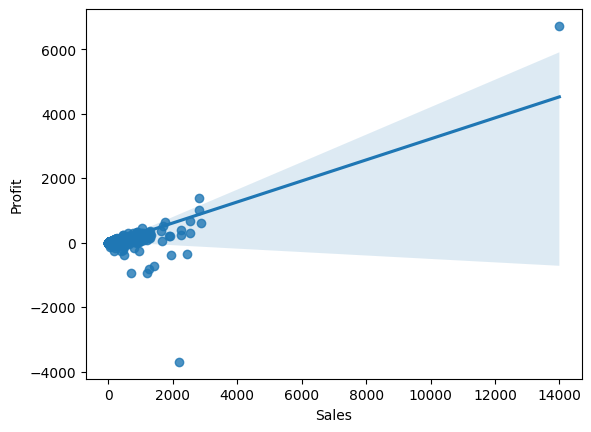

In [83]:
#Lineal
sns.regplot(x="Sales", y="Profit", data=df_unido)

Cuanto mayor es el precio de los productos, mayor ganancia habrá. De todas formas, no es muy útil la gráfica lineal para analizar el rendimiento del mercadito

<Axes: xlabel='Category', ylabel='Profit'>

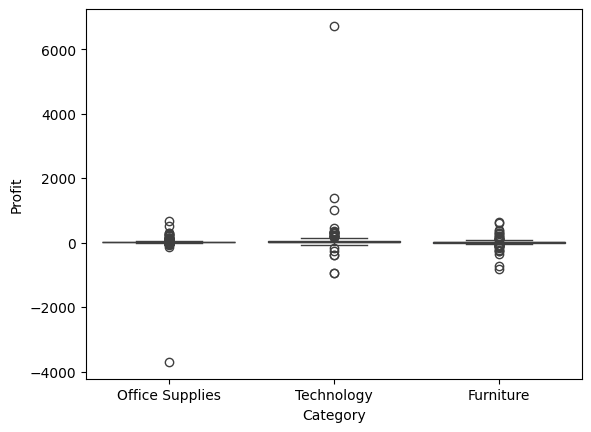

In [84]:
#Boxplot
sns.boxplot(x="Category", y="Profit", data=df_unido)

No me da ninguna información de qué categoría me da más ganancia

<Axes: xlabel='Profit', ylabel='Sub-Category'>

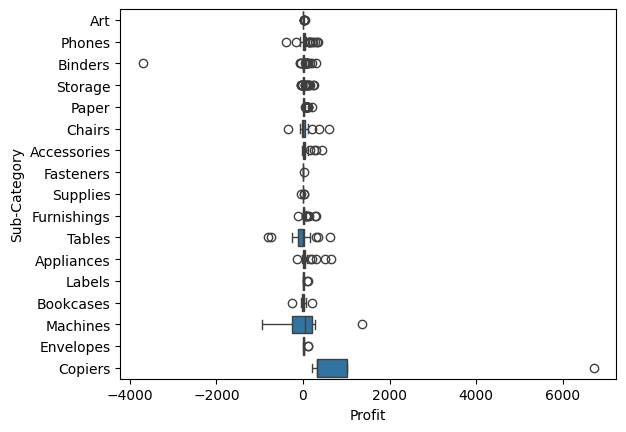

In [85]:
sns.boxplot(x="Profit", y="Sub-Category", data=df_unido)

Aquí puede observarse quizás algo más que en la gráfica anterior. Se ve claramente que lo que genera mayor ganancia al negocio son las fotocopias (copiers) que se realizan a los clientes, alcanzando una ganancia de hasta unos 1500 (no sé que moneda será). Por otro lado, Se ve que las máquinas (Machines) producen una pérdida significativa en ciertos casos al local, por lo que el mismo se ve afectado para mal debido a esta subcategoría 

In [86]:
#Recorto el dataframe para utilizar la información que me es útil
df_aux=df_unido[['Quantity','Sales','Discount','Profit']]

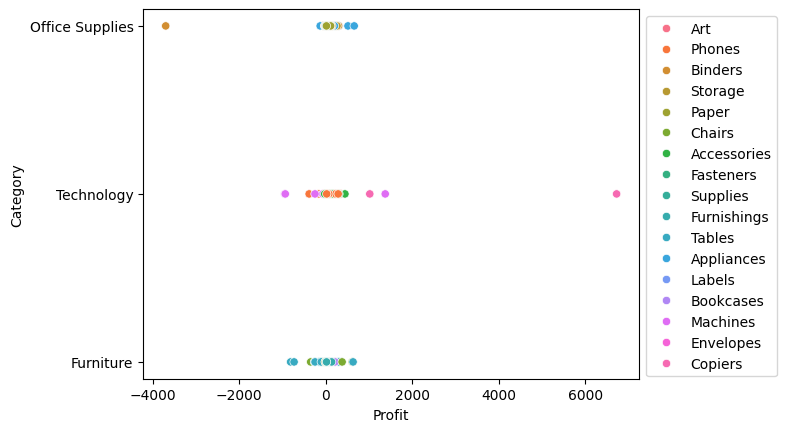

In [87]:
sns.scatterplot(x='Profit',y='Category',data=df_unido,hue='Sub-Category')
plt.legend(bbox_to_anchor=(1,1),loc=2)

Viendo muy refinadamente en esta última gráfica, puede apreciarse que hay Outliers (ya los habiamos visto en el boxplot), y hay varios de ellos que se puede deducir muy sencillamente que son datos erróneos, como lo son el dato que genera una pérdida de casi 4000 (carpetas o binders), así también el dato que aparece con una ganancia brutal, dado por las fotocopiadoras.
Observando por categorías, puede quizás apreciarse una leve mejoría en las ganancias a partir de la venta de material de oficina, mientras que las ventas de productos tecnológicos no presentan un buen escenario para el negocio.

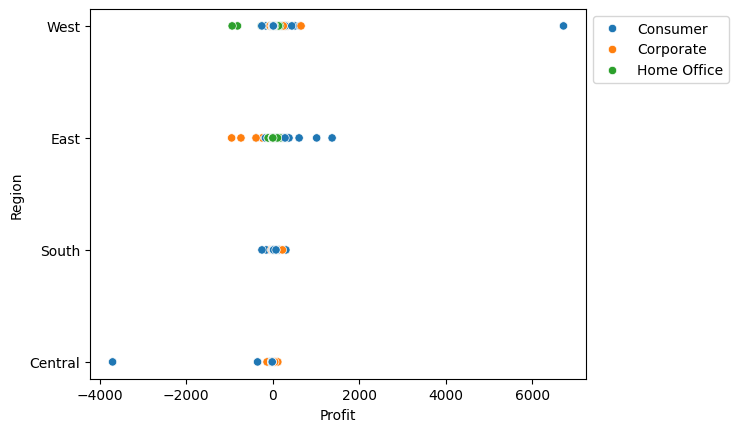

In [88]:
sns.scatterplot(x='Profit',y='Region',data=df_unido,hue='Segment')
plt.legend(bbox_to_anchor=(1,1),loc=2)

### <font color='green'> Análisis estadístico descriptivo. Aquí voy a analizar mejor quién compra más, según el tipo de clientes, ya que el scatter plot realizado no brinda suficiente información</font>

In [89]:
df_unido

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Person
0,19,CA-2014-143336,8/27/2014,9/1/2014,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,Yes,Anna Andreadi
1,20,CA-2014-143336,8/27/2014,9/1/2014,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110,Yes,Anna Andreadi
2,21,CA-2014-143336,8/27/2014,9/1/2014,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4,0.2,7.3840,Yes,Anna Andreadi
3,56,CA-2016-111682,6/17/2016,6/18/2016,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.560,6,0.0,52.1400,Yes,Chuck Magee
4,57,CA-2016-111682,6/17/2016,6/18/2016,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,32.400,5,0.0,15.5520,Yes,Chuck Magee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,9958,US-2014-143287,11/11/2014,11/17/2014,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,OFF-PA-10004039,Office Supplies,Paper,Xerox 1882,223.920,4,0.0,109.7208,Yes,Chuck Magee
796,9959,US-2014-143287,11/11/2014,11/17/2014,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,OFF-SU-10001574,Office Supplies,Supplies,Acme Value Line Scissors,7.300,2,0.0,2.1900,Yes,Chuck Magee
797,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,Yes,Anna Andreadi
798,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,Yes,Anna Andreadi


In [90]:

#GROUPBY (AGRUPA VALORES ÚNICOS SEGÚN OTRA VARIABLE)
df_clientes = df_unido[['Segment','Sales']]
df_clientes = df_clientes.groupby(['Segment'],as_index=False).mean()
df_clientes

,Segment,Sales
0,Consumer,247.383221
1,Corporate,201.992388
2,Home Office,198.350274


Puede verse en la tabla con las ventas promedio según el tipo de consumidor, que los mayores compradores son los consumidores habituales (que realizan compras para uso personal). Luego las empresas y los trabajadores de HO generan aproximadamente lo mismo para el negocio. Podemos de todas formas ver qué compra mayormente cada tipo de cliente.

In [91]:
df_clientes_2 = df_unido[['Category','Segment','Sales']]
df_clientes_2 = df_clientes_2.groupby(['Category','Segment'],as_index=False).mean()
df_clientes_2

,Category,Segment,Sales
0,Furniture,Consumer,342.040272
1,Furniture,Corporate,321.916884
2,Furniture,Home Office,421.913087
3,Office Supplies,Consumer,100.353301
4,Office Supplies,Corporate,113.060878
5,Office Supplies,Home Office,88.063662
6,Technology,Consumer,561.937874
7,Technology,Corporate,360.198217
8,Technology,Home Office,315.237435


Ahora teniendo un mayor detalle de las ventas, se aprecia como los trabajadores de H.O no gastan tanto en material para oficina (por obvias razones), mientras que los mayores compradores en esos lados son las empresas (aunque sin mucha diferencia con el resto de clientes). También se aprecia una gran diferencia en las ventas realizadas hacia consumidores comunes en el rubro tecnológico, donde supera con creces a los valores generados por corporaciones y trabajadores de H.O. Por último, está bueno recalcar que estos últimos clientes prefieren generar gastos en amoblamiento para su casa, se podría creer que para tener un lugar de trabajo cómodo.